In [163]:
# Numerical packages
import numpy as np, xarray as xr
# Visualization packages
import matplotlib, matplotlib.pyplot as plt
import matplotlib.animation
# Utility packages
import time

# Internal imports
from run import initialize, integrate
from utils import storage, helper, math, solver, visualization

In [168]:
def main(N=50, U=10, nu=0.1, cfl=0.25, runtime=0.1, timestep_method='projection', spatial_method='cdf2', visualize=False):
    
    ''' 1. Derive values needed to run initialization. '''
    
    # Print the Reynolds number to know the flow regime (inertial or viscous, assumes characteristic unit length)
    Re = U/nu
    print('Reynolds number: {0:.2f}'.format(Re))
    
    ''' 2. Initialize the model and domain. '''
    # Get initial data
    N, x, z, dx, dz, dt, time_max, data = initialize.init(N, U, rho_0=1, end_time=runtime, cfl=cfl)
    # Add time data variable (in contrast to the time index, t)
    data['time'] = (['t'], np.empty(len(data.t)))

    ''' 3. Run the model to solve for the given flow conditions. '''
    data, elapsed_time, iterations = integrate.run(data, time_max, timestep_method, spatial_method, dx, dz, dt, U, nu)
    
    print('###############################################################\nModel run with {0} time integration using {1} spatial discretization for an {2}x{2} grid ran in {3:.2f} s with {4} iterations'.format(timestep_method, spatial_method, N, elapsed_time, iterations))
    
    ''' 4. Visualize data. '''
    # Plot fields at the model run ending
    if visualize:
        visualization.field_plots(data, runtime-dt, dt, U, nu, Re=Re)

Reynolds number: 100.00
Timestep 100 at time 0.025s, Re = 100.00
Timestep 200 at time 0.050s, Re = 100.00
Timestep 300 at time 0.075s, Re = 100.00
###############################################################
Model run with projection time integration using cdf2 spatial discretization for an 50x50 grid ran in 1.58 s with 400 iterations


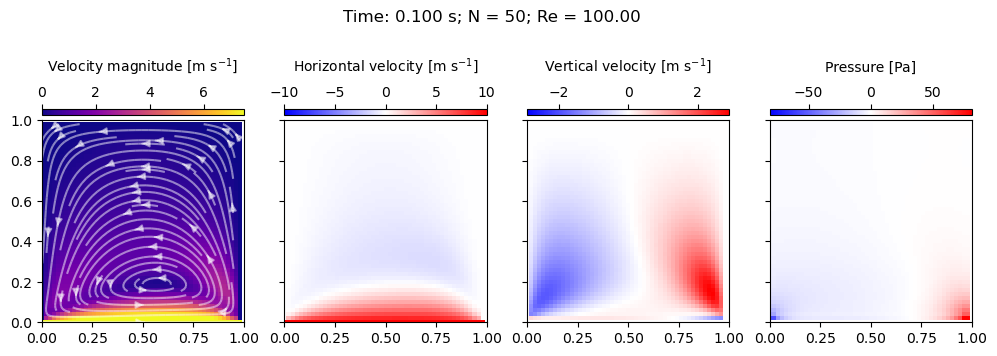

In [169]:
main()